## Data Retrieving

#### <font color="sky blue">Read Review for Toys from Amazon S3</font>

In [1]:
# Import SparkSession
from pyspark.sql import SparkSession

# CreateSparkSession
spark = SparkSession.builder.appName("amzn_review_sports").getOrCreate()

In [2]:
# Import struct fields
from pyspark.sql.types import StructField, StringType, IntegerType, DateType, StructType

# Lists of struct fields
schema = [\
    StructField("marketplace", StringType(), True),\
    StructField("customer_id", IntegerType(), True),\
    StructField("review_id", StringType(), True),\
    StructField("product_id", StringType(), True),\
    StructField("product_parent", IntegerType(), True),\
    StructField("product_title", StringType(), True),\
    StructField("product_category", StringType(), True),\
    StructField("star_rating", IntegerType(), True),\
    StructField("helpful_votes", IntegerType(), True),\
    StructField("total_votes", IntegerType(), True),\
    StructField("vine", StringType(), True),\
    StructField("verified_purchase", StringType(), True),\
    StructField("review_headline", StringType(), True),\
    StructField("review_body", StringType(), True),\
    StructField("review_date", DateType(), True)\
]

# View "schema"
schema

[StructField(marketplace,StringType,true),
 StructField(customer_id,IntegerType,true),
 StructField(review_id,StringType,true),
 StructField(product_id,StringType,true),
 StructField(product_parent,IntegerType,true),
 StructField(product_title,StringType,true),
 StructField(product_category,StringType,true),
 StructField(star_rating,IntegerType,true),
 StructField(helpful_votes,IntegerType,true),
 StructField(total_votes,IntegerType,true),
 StructField(vine,StringType,true),
 StructField(verified_purchase,StringType,true),
 StructField(review_headline,StringType,true),
 StructField(review_body,StringType,true),
 StructField(review_date,DateType,true)]

In [3]:
# Pass in fields
final = StructType(fields=schema)

In [4]:
# Load in data with schema
from pyspark import SparkFiles
url = "https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Sports_v1_00.tsv.gz"
spark.sparkContext.addFile(url)
df = spark.read.csv(SparkFiles.get("amazon_reviews_us_Sports_v1_00.tsv.gz"), sep="\t", header=True, schema=final)

# View Amazon sport review (us) dataset
df.show()

+-----------+-----------+--------------+----------+--------------+--------------------+----------------+-----------+-------------+-----------+----+-----------------+--------------------+--------------------+-----------+
|marketplace|customer_id|     review_id|product_id|product_parent|       product_title|product_category|star_rating|helpful_votes|total_votes|vine|verified_purchase|     review_headline|         review_body|review_date|
+-----------+-----------+--------------+----------+--------------+--------------------+----------------+-----------+-------------+-----------+----+-----------------+--------------------+--------------------+-----------+
|         US|   48945260|R1WBPB8MDCCN8F|B012P7UPSM|     409940130|Chicago Blackhawk...|          Sports|          5|            0|          0|   N|                N|   LOVE IT. 6 stars!|Bought this last ...| 2015-08-31|
|         US|    5782091|R32M0YEWV77XG8|B001GQ3VHG|     657746679|Copag Poker Size ...|          Sports|          5|    

In [5]:
# Count the number of records (rows) in the dataset
print(f"There are {df.count()} records (rows) in Amazon sport review (us) dataset.")

There are 4850360 records (rows) in Amazon sport review (us) dataset.


## Table Generation and SQL DB Transferring

#### <font color="sky blue">"review_id_table"</font>

In [6]:
# DataFrame for table of "review_id_table"
review_id_table = df.select("review_id", "customer_id", "product_id", "product_parent", "review_date")

# View "review_id_table"
review_id_table.show(truncate=False)

+--------------+-----------+----------+--------------+-----------+
|review_id     |customer_id|product_id|product_parent|review_date|
+--------------+-----------+----------+--------------+-----------+
|R1WBPB8MDCCN8F|48945260   |B012P7UPSM|409940130     |2015-08-31 |
|R32M0YEWV77XG8|5782091    |B001GQ3VHG|657746679     |2015-08-31 |
|RR8V7WR27NXJ5 |45813853   |B008VS8M58|962442336     |2015-08-31 |
|R1MHO5V9Z932AY|1593730    |B005F06F4U|74305227      |2015-08-31 |
|R16PD71086BD2V|29605511   |B010T4IE2C|787185588     |2015-08-31 |
|R1Z8IFGWTRWXT6|11112959   |B004RKJGLS|94127483      |2015-08-31 |
|R3AUMSHAW73HWN|108031     |B005V3DCBU|526977496     |2015-08-31 |
|R2KWDWFOHGX6FL|13981540   |B00MHT9WN8|26521265      |2015-08-31 |
|R3H9543FWBWFBU|37993909   |B001CSIRQ8|652431165     |2015-08-31 |
|RUANXOQ9W3OU5 |26040213   |B001KZ3NOO|635861713     |2015-08-31 |
|R31673RTGEZSW7|34657602   |B00005RCQS|72099763      |2015-08-31 |
|R22OQLFSH42RCM|14346192   |B00FA7RWVI|757354022     |2015-08-

In [7]:
# Check the data type of "review_id_table"
review_id_table.printSchema()

root
 |-- review_id: string (nullable = true)
 |-- customer_id: integer (nullable = true)
 |-- product_id: string (nullable = true)
 |-- product_parent: integer (nullable = true)
 |-- review_date: date (nullable = true)



In [ ]:
# Save "review_id_table" to Amazon RDS
review_id_table.write.format('jdbc').options(
      url='jdbc:mysql://koudash-mysql.cebj4fqgco4p.us-west-1.rds.amazonaws.com:3306/amzn_review_sports',
      driver='com.mysql.jdbc.Driver',
      dbtable='review_id_table',
      user='foo',
      password='bar').mode('append').save()

#### <font color="sky blue">"products"</font>

In [8]:
# DataFrame for table of "products"
products = df.select("product_id", "product_title")

# View "productsf"
products.show(truncate=False)

+----------+--------------------------------------------------------------------------------------------------------------------+
|product_id|product_title                                                                                                       |
+----------+--------------------------------------------------------------------------------------------------------------------+
|B012P7UPSM|Chicago Blackhawks Adult Cuff Knit Beanie w/ Pom One Size Fits All NHL Authentic Hat Cap - OSFA                     |
|B001GQ3VHG|Copag Poker Size Regular Index 1546 Playing Cards 2 decks (Black Gold Setup)                                        |
|B008VS8M58|Baoer 223 5.56x45mm Caliber Cartridge Laser Bore Sighter Boresighter                                                |
|B005F06F4U|All Terrain Tackle Jig - Grass Master - June Bug - 3/4oz- 2 Pack                                                    |
|B010T4IE2C|Swim Cap - 3 Pack (Blue, Black & Red)                                         

In [9]:
# Check the data type of "products_df"
products.printSchema()

root
 |-- product_id: string (nullable = true)
 |-- product_title: string (nullable = true)



In [ ]:
# Save "products" to Amazon RDS
products.write.format('jdbc').options(
      url='jdbc:mysql://koudash-mysql.cebj4fqgco4p.us-west-1.rds.amazonaws.com:3306/amzn_review_sports',
      driver='com.mysql.jdbc.Driver',
      dbtable='products',
      user='foo',
      password='bar').mode('append').save()

#### <font color="sky blue">"customers"</font>

In [10]:
# DataFrame for table of "customers"
customers = df.select("customer_id")

# View "customers"
customers.show(truncate=False)

+-----------+
|customer_id|
+-----------+
|48945260   |
|5782091    |
|45813853   |
|1593730    |
|29605511   |
|11112959   |
|108031     |
|13981540   |
|37993909   |
|26040213   |
|34657602   |
|14346192   |
|38782687   |
|27138575   |
|11838771   |
|535800     |
|23156579   |
|48107879   |
|27260960   |
|39537314   |
+-----------+
only showing top 20 rows



In [11]:
# Import functions
import pyspark.sql.functions as func

# Count customer id and create new column called "customer_count" to store such data
customers = customers.groupby("customer_id").count().withColumnRenamed("count", "customer_count").sort(func.col("count").desc())

# View "customers"
customers.show()

+-----------+--------------+
|customer_id|customer_count|
+-----------+--------------+
|   50820654|           552|
|   37651511|           294|
|   26955164|           272|
|   50227539|           257|
|   52870270|           245|
|   25355517|           225|
|   13355404|           193|
|   46160224|           177|
|   26772822|           172|
|   52770861|           170|
|   49335121|           162|
|    1871743|           154|
|   25436988|           144|
|   20032310|           143|
|   19512365|           142|
|   51354368|           140|
|   18453567|           138|
|   29505740|           136|
|   36579538|           136|
|   26502328|           132|
+-----------+--------------+
only showing top 20 rows



In [12]:
# Check the data type of "customers"
customers.printSchema()

root
 |-- customer_id: integer (nullable = true)
 |-- customer_count: long (nullable = false)



In [13]:
# Change the datatype of "customer_count" column from Long to Integer
customers = customers.withColumn("customer_count", customers["customer_count"].cast("Integer"))

# View "customers"
customers.show()

+-----------+--------------+
|customer_id|customer_count|
+-----------+--------------+
|   50820654|           552|
|   37651511|           294|
|   26955164|           272|
|   50227539|           257|
|   52870270|           245|
|   25355517|           225|
|   13355404|           193|
|   46160224|           177|
|   26772822|           172|
|   52770861|           170|
|   49335121|           162|
|    1871743|           154|
|   25436988|           144|
|   20032310|           143|
|   19512365|           142|
|   51354368|           140|
|   18453567|           138|
|   29505740|           136|
|   36579538|           136|
|   26502328|           132|
+-----------+--------------+
only showing top 20 rows



In [14]:
# Check the data type of "customers"
customers.printSchema()

root
 |-- customer_id: integer (nullable = true)
 |-- customer_count: integer (nullable = false)



In [ ]:
# Save "customers" to Amazon RDS
customers.write.format('jdbc').options(
      url='jdbc:mysql://koudash-mysql.cebj4fqgco4p.us-west-1.rds.amazonaws.com:3306/amzn_review_sports',
      driver='com.mysql.jdbc.Driver',
      dbtable='customers',
      user='foo',
      password='bar').mode('append').save()

#### <font color="sky blue">"vine_table"</font>

In [15]:
# DataFrame for table of vine_table"
vine_table = df.select("review_id", "star_rating", "helpful_votes", "total_votes", "vine")

# View "vine_table"
vine_table.show(truncate=False)


+--------------+-----------+-------------+-----------+----+
|review_id     |star_rating|helpful_votes|total_votes|vine|
+--------------+-----------+-------------+-----------+----+
|R1WBPB8MDCCN8F|5          |0            |0          |N   |
|R32M0YEWV77XG8|5          |1            |1          |N   |
|RR8V7WR27NXJ5 |1          |0            |0          |N   |
|R1MHO5V9Z932AY|5          |0            |0          |N   |
|R16PD71086BD2V|5          |0            |1          |N   |
|R1Z8IFGWTRWXT6|3          |0            |0          |N   |
|R3AUMSHAW73HWN|4          |2            |3          |N   |
|R2KWDWFOHGX6FL|5          |0            |0          |N   |
|R3H9543FWBWFBU|5          |1            |1          |N   |
|RUANXOQ9W3OU5 |5          |0            |0          |N   |
|R31673RTGEZSW7|5          |2            |2          |N   |
|R22OQLFSH42RCM|5          |1            |1          |N   |
|R12LEL4F3TSZUJ|5          |2            |2          |N   |
|R2L9XWD03072NI|5          |1           

In [16]:
# Check the data type of "vine_table"
vine_table.printSchema()

root
 |-- review_id: string (nullable = true)
 |-- star_rating: integer (nullable = true)
 |-- helpful_votes: integer (nullable = true)
 |-- total_votes: integer (nullable = true)
 |-- vine: string (nullable = true)



In [ ]:
# Save "vine_table" to Amazon RDS
vine_table.write.format('jdbc').options(
      url='jdbc:mysql://koudash-mysql.cebj4fqgco4p.us-west-1.rds.amazonaws.com:3306/amzn_review_sports',
      driver='com.mysql.jdbc.Driver',
      dbtable='vine_table',
      user='foo',
      password='bar').mode('append').save()

## Data Analysis

#### <font color="sky blue">Average of helpful/total votes per star rating</font>

In [20]:
# Calculate average of helpful votes for each star rating
helpful_votes_per_star_rating = vine_table.groupBy("star_rating").avg("helpful_votes").collect()

# View "helpful_votes_per_star_rating"
helpful_votes_per_star_rating

[Row(star_rating=None, avg(helpful_votes)=None),
 Row(star_rating=1, avg(helpful_votes)=2.511137744348473),
 Row(star_rating=3, avg(helpful_votes)=1.6627503857142483),
 Row(star_rating=5, avg(helpful_votes)=1.290121113640251),
 Row(star_rating=4, avg(helpful_votes)=1.5191941768460306),
 Row(star_rating=2, avg(helpful_votes)=1.787343317419833)]

In [18]:
# Calculate average of total votes for each star rating
total_votes_per_star_rating = vine_table.groupBy("star_rating").avg("total_votes").collect()

# View "total_votes_per_star_rating"
total_votes_per_star_rating

[Row(star_rating=None, avg(total_votes)=None),
 Row(star_rating=1, avg(total_votes)=3.9916656334807343),
 Row(star_rating=3, avg(total_votes)=2.259851812134163),
 Row(star_rating=5, avg(total_votes)=1.5243937739299764),
 Row(star_rating=4, avg(total_votes)=1.823510147491215),
 Row(star_rating=2, avg(total_votes)=2.6274845769842825)]

In [19]:
# List for helpful/total votes (avg.) and star ratings
x_im = []
y1_im = []
y2_im = []
x_axis = []
y1_axis = []
y2_axis = []

# Temporarily store helpful/total votes (avg.) and star ratings
[x_im.append(row[0]) for row in helpful_votes_per_star_rating if row[0] != None]
[y1_im.append(row[1]) for row in helpful_votes_per_star_rating if row[0] != None]
[y2_im.append(row[1]) for row in total_votes_per_star_rating if row[0] != None]
# Adjust the order for plotting
[x_axis.append(x_im[i]) for i in [0, 4, 1, 3, 2]]
[y1_axis.append(y1_im[i]) for i in [0, 4, 1, 3, 2]]
[y2_axis.append(y2_im[i]) for i in [0, 4, 1, 3, 2]]

# Print helpful/total votes (avg.) and star ratings (as x- and y-axes)
print(f"Star rating: {x_axis}")
print(f"Helpful votes (avg.): {y1_axis}")
print(f"Toatl votes (avg.): {y2_axis}")

Star rating: [1, 2, 3, 4, 5]
Helpful votes (avg.): [2.511137744348473, 1.787343317419833, 1.6627503857142483, 1.5191941768460306, 1.290121113640251]
Toatl votes (avg.): [3.9916656334807343, 2.6274845769842825, 2.259851812134163, 1.823510147491215, 1.5243937739299764]


In [21]:
import matplotlib.pyplot as plt

# Line-scatter plot
plt.plot(x_axis, y1_axis, '-o', c='r', label="Helpful votes (avg)")
plt.plot(x_axis, y2_axis, '-x', c='b', label="Total votes (avg)")

# Create title
plt.title("Average of Helpful/Total Votes per Star Rating")

# Create labels for x and y axes
plt.xlabel("Star rating")
plt.ylabel("Counts")

# Create x-ticks
plt.xticks(x_axis)

# Create legend
plt.legend(loc="best")

# Save figure
plt.savefig("../figures/SPORTS_avg_helpful_or_total_votes_per_star_rating.png", bbox_inches='tight', dpi=300)

plt.show()

<Figure size 640x480 with 1 Axes>

###### It can be told from the above plot that counts for both total and helpful votes are negatively correlated with the star rating.

#### <font color="sky blue">Helpful votes study subgrouped by total votes</font>

In [22]:
# Look at the "mean" (not "median"), "25%" and "75%" of "helpful_votes" and "total_votes" columns from "vine_table"
vine_table.select("helpful_votes", "total_votes").summary("mean", "25%", "75%").show()

+-------+-----------------+-----------------+
|summary|    helpful_votes|      total_votes|
+-------+-----------------+-----------------+
|   mean|1.473776296957066|1.870526478365164|
|    25%|                0|                0|
|    75%|                1|                1|
+-------+-----------------+-----------------+



In [23]:
# Dictionary to hold "total_votes"-subgrouped "vine_table"
vine_tv_dict = {0 : "", 1 : "", 2 : "", 3 : ""}

# Subgroup "vin_table" by counts of "total_votes"
for i in range(4):
    if i != 3:
        vine_tv_dict[i] = vine_table.filter(vine_table["total_votes"] == i).select("review_id", "helpful_votes", "vine")
    else:
        vine_tv_dict[i] = vine_table.filter(vine_table["total_votes"] >= i).select("review_id", "helpful_votes", "vine")

In [24]:
# Lists to hold average helpful votes subgrouped by total votes
vt_helpful_avg_list = []
vf_helpful_avg_list = []

for i in range(4):
    
    # Divide "vine_table" into two based on the value of "vine" 
    vine_true = vine_tv_dict[i].filter(vine_tv_dict[i]["vine"] == "Y").select("review_id", "helpful_votes")
    vine_false = vine_tv_dict[i].filter(vine_tv_dict[i]["vine"] == "N").select("review_id", "helpful_votes")
    
    # Calculate average helpful votes and appended them to the above lists
    vt_helpful_avg_list.append(vine_true.select(func.avg("helpful_votes")).collect()[0][0])
    vf_helpful_avg_list.append(vine_false.select(func.avg("helpful_votes")).collect()[0][0])
    
    print(i)
    
# Print results
print(f"Average helpful votes from vine population: {vt_helpful_avg_list}")
print(f"Average helpful votes not from vine population: {vf_helpful_avg_list}")

0
1
2
3
Average helpful votes from vine population: [0.0, 0.5359382537385432, 1.1504571903574397, 12.803189257238774]
Average helpful votes not from vine population: [0.0, 0.6715251897517895, 1.3828716365741003, 8.683120766922679]


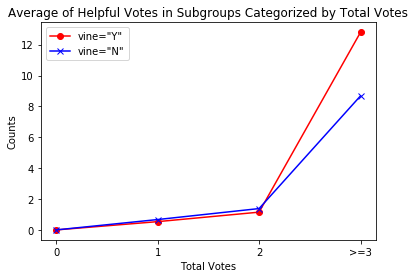

In [25]:
# Line-scatter plot
plt.plot(list(range(4)), vt_helpful_avg_list, '-o', c='r', label='vine="Y"')
plt.plot(list(range(4)), vf_helpful_avg_list, '-x', c='b', label='vine="N"')

# Create title
plt.title("Average of Helpful Votes in Subgroups Categorized by Total Votes")

# Create labels for x and y axes
plt.xlabel("Total Votes")
plt.ylabel("Counts")

# Create x-ticks
plt.xticks(list(range(4)), ["0", "1", "2", ">=3"])

# Create legend
plt.legend(loc="best")

# Save figure
plt.savefig("../figures/SPORTS_avg_helpful_votes_by_total_votes.png", bbox_inches='tight', dpi=300)

plt.show()

###### The average of helpful votes from vine customers does not outweigh over those from non vine customers in that the total votes are not greater than two. Only when going beyond that range are reviews from vine costomers more helpful.